# Value at Risk (VaR)

Value at Risk (VaR) is a statistical measure used to assess the level of risk associated with a portfolio or company. The VaR measures the maximum potential loss with a degree of confidence for a specified period. For example, suppose a portfolio of investments has a one-year 10 percent VaR of 5(UDS) million. Therefore, the portfolio has a 10 percent chance of losing more than 5(USD) million over a one-year period.


VaR calculation methods:
    1. Historical method
    2. Delta normal method. (Variance-covariance method / Parametric method)
    3. Monte Carlo simulation method.
    
    
 
1. Historical method:
The historical method is the simplest method for calculating Value at Risk. Market data for the last 250 days is taken to calculate the percentage change for each risk factor on each day. Each percentage change is then calculated with current market values to present 250 scenarios for future value. For each of the scenarios, the portfolio is valued using full, non-linear pricing models. The third worst day selected is assumed to be 99% VaR.
    
  
2. Drawbacks of vairance-covariance method:
    1. assumption of normal distribution of returns
    2. standard market conditions 
            - not well suited for extreme events.
This method assumes a normal distribution in returns. Two factors are to be estimated – an expected return and a standard deviation. This method is best suited to risk measurement problems where the distributions are known and reliably estimated. The method is unreliable when the sample size is very small.


3. Monte Carlo
Under the Monte Carlo method, Value at Risk is calculated by randomly creating a number of scenarios for future rates using non-linear pricing models to estimate the change in value for each scenario, and then calculating the VaR according to the worst losses. This method is suitable for a great range of risk measurement problems, especially when dealing with complicated factors. It assumes that there is a known probability distribution for risk factors.

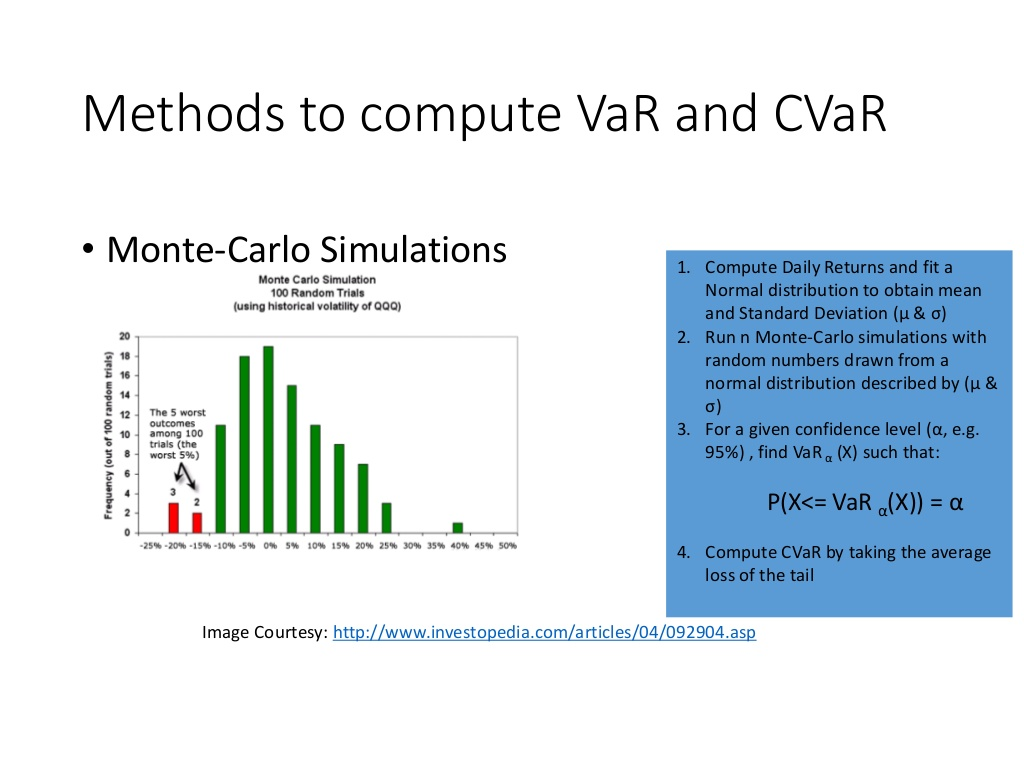
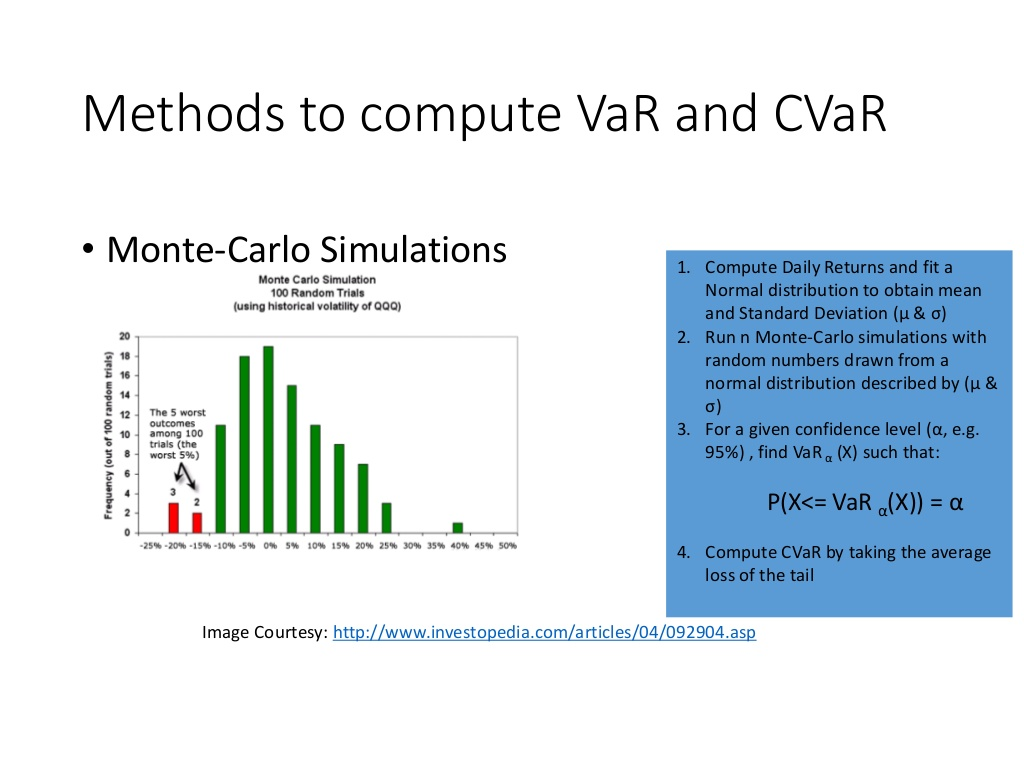
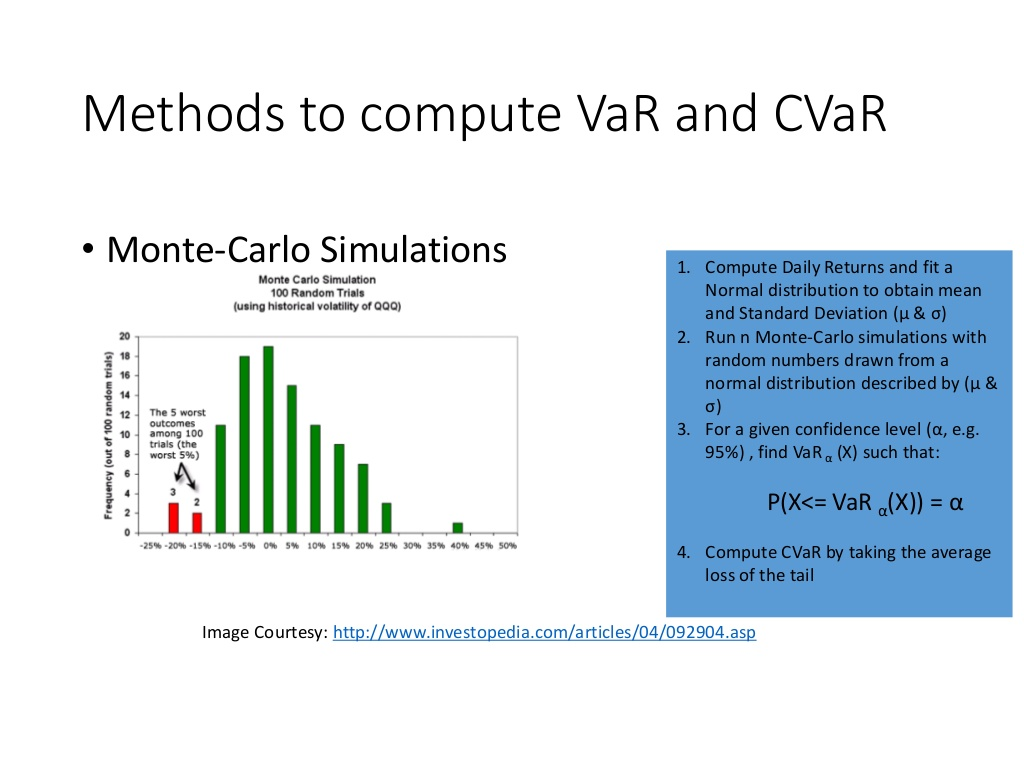

In [1]:
import datetime as dt
import os
import subprocess 
import numpy as np
import pandas as pd

#to get financial data
from pandas_datareader import data as pdr

#visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
#import plotly.graph_objs as go
%matplotlib inline
#visualization with seaborn
import seaborn as sns


/Users/reejungkim/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
tickers = ['GOOG', 'NKLA', 'FB', 'AAPL']

In [3]:
weights = np.array([.25, .25, .35, .15])

In [4]:
initial_investment = 1000000

In [5]:
df = pdr.DataReader(tickers, 'yahoo', '2020-06-03',  dt.date.today())['Close']
df.head()

Symbols            GOOG       NKLA          FB        AAPL
Date                                                      
2020-06-03  1436.380005  33.970001  230.160004  325.119995
2020-06-04  1412.180054  33.750000  226.289993  322.320007
2020-06-05  1438.390015  35.970001  230.770004  331.500000
2020-06-08  1446.609985  73.269997  231.399994  333.459991
2020-06-09  1456.160034  79.730003  238.669998  343.989990

# plot 

In [6]:
df.reset_index().head()

Symbols       Date         GOOG       NKLA          FB        AAPL
0       2020-06-03  1436.380005  33.970001  230.160004  325.119995
1       2020-06-04  1412.180054  33.750000  226.289993  322.320007
2       2020-06-05  1438.390015  35.970001  230.770004  331.500000
3       2020-06-08  1446.609985  73.269997  231.399994  333.459991
4       2020-06-09  1456.160034  79.730003  238.669998  343.989990

In [7]:
df_melt = df.reset_index().melt(id_vars='Date')
df_melt.head(3)

Date Symbols        value
0 2020-06-03    GOOG  1436.380005
1 2020-06-04    GOOG  1412.180054
2 2020-06-05    GOOG  1438.390015

Text(0.5, 20.80000000000002, 'Date')

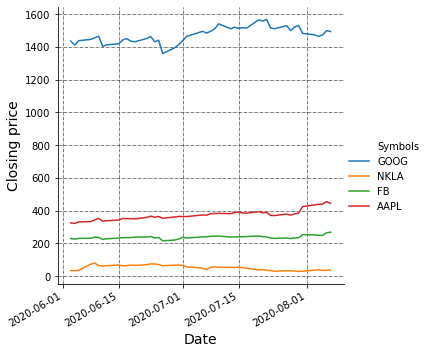

In [8]:
sns.relplot(x='Date', y='value', kind='line', hue ='Symbols',data=df_melt).fig.autofmt_xdate()
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.title('', fontsize=16)
plt.ylabel('Closing price', fontsize=14)
plt.xlabel('Date', fontsize=14)

# VaR claculation using variance-covariance method

In [9]:
#Returns computation 
returns = df.pct_change()
returns.head()

Symbols         GOOG      NKLA        FB      AAPL
Date                                              
2020-06-03       NaN       NaN       NaN       NaN
2020-06-04 -0.016848 -0.006476 -0.016814 -0.008612
2020-06-05  0.018560  0.065778  0.019798  0.028481
2020-06-08  0.005715  1.036975  0.002730  0.005912
2020-06-09  0.006602  0.088167  0.031417  0.031578

In [10]:
cov_matrix = returns.cov()
cov_matrix

Symbols      GOOG      NKLA        FB      AAPL
Symbols                                        
GOOG     0.000322  0.000161  0.000274  0.000183
NKLA     0.000161  0.033687  0.000586  0.000594
FB       0.000274  0.000586  0.000703  0.000486
AAPL     0.000183  0.000594  0.000486  0.000578

In [11]:
returns.var()

Symbols
GOOG    0.000322
NKLA    0.033687
FB      0.000703
AAPL    0.000578
dtype: float64

# expected return of each stock

In [12]:
returns.mean()

Symbols
GOOG    0.001022
NKLA    0.013601
FB      0.003695
AAPL    0.007097
dtype: float64

In [13]:
avg_returns = returns.mean()

# expected portfolio return

In [14]:
avg_returns.dot(weights)

0.006013457357820472

In [15]:
avg_return_port = avg_returns.dot(weights)

# standard deviation of portfolio

In [16]:
port_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))
port_stdev 

0.050047564310789466

# expected return on initial investment

In [17]:
investment_return = (1 + avg_return_port)* initial_investment

In [18]:
investment_sd = initial_investment * port_stdev

# Var Calculation

In [19]:
from scipy.stats import norm
#ppf: percent point function (quantile function)
confidence_level = 0.05
cutoff1 = norm.ppf(confidence_level, investment_return, investment_sd)

In [20]:
var1 = initial_investment - cutoff1

With 95% confidence level, the portfolio of 1M will not exceed losses greater than 86.2k over a one day period

In [21]:
# Calculate n Day VaR
var_array = []
num_days = int(15)
for x in range(1, num_days+1):    
    var_array.append(np.round(var1 * np.sqrt(x),2))
    print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var1 * np.sqrt(x),2)))


1 day VaR @ 95% confidence: 76307.46
2 day VaR @ 95% confidence: 107915.05
3 day VaR @ 95% confidence: 132168.4
4 day VaR @ 95% confidence: 152614.92
5 day VaR @ 95% confidence: 170628.67
6 day VaR @ 95% confidence: 186914.34
7 day VaR @ 95% confidence: 201890.56
8 day VaR @ 95% confidence: 215830.09
9 day VaR @ 95% confidence: 228922.38
10 day VaR @ 95% confidence: 241305.38
11 day VaR @ 95% confidence: 253083.21
12 day VaR @ 95% confidence: 264336.8
13 day VaR @ 95% confidence: 275130.46
14 day VaR @ 95% confidence: 285516.37
15 day VaR @ 95% confidence: 295537.52


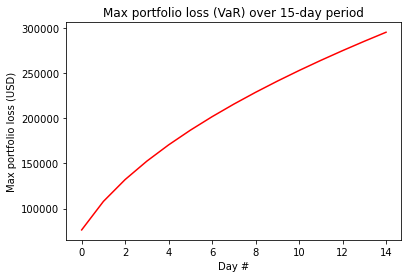

In [22]:
plt.xlabel("Day #")
plt.ylabel("Max portfolio loss (USD)")
plt.title("Max portfolio loss (VaR) over 15-day period")
plt.plot(var_array, "r")